# <center>__Project 2__</center>
## <center>__Cointegration, Error-Correction, and Pairs Trading__</center>
### <center>Finance 5330<center>
#### <center>Emily Rice & Ryan Voges<center>

In [1]:
#import Pkg; Pkg.add("GLM")
#import Pkg; Pkg.add("HypothesisTests")
using StatsKit
using StatsPlots
using DataFrames
using GLM
using HypothesisTests: ADFTest

In [3]:
df = CSV.read("WaterStocks.csv");

┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `using DataFrames; CSV.read(input, DataFrame; kw...)
│   caller = read(::String) at CSV.jl:46
└ @ CSV C:\Users\chefm\.julia\packages\CSV\UIgP3\src\CSV.jl:46


In [4]:
first(df,5)

,PERMNO,date,TICKER,COMNAM,PERMCO,BIDLO,ASKHI
,Int64,Int64,String,String,Int64,Float64,Float64
1,26463,19970102,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.0,30.0
2,26463,19970103,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.25,30.0
3,26463,19970106,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.25,30.0
4,26463,19970107,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0
5,26463,19970108,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0


In [5]:
unique(df.TICKER)

5-element Array{String,1}:
 "CTWS"
 "PSC"
 "WTR"
 "SCW"
 "AWR"

In [33]:
unique(df.PERMNO)

3-element Array{Int64,1}:
 26463
 52898
 71475

In [60]:
ctws_df = filter(x -> x.PERMNO .== 26463, df)

,PERMNO,date,TICKER,COMNAM,PERMCO,BIDLO,ASKHI
,Int64,Int64,String,String,Int64,Float64,Float64
1,26463,19970102,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.0,30.0
2,26463,19970103,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.25,30.0
3,26463,19970106,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.25,30.0
4,26463,19970107,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0
5,26463,19970108,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0
6,26463,19970109,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0
7,26463,19970110,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0
8,26463,19970113,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,29.125
9,26463,19970114,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,29.125


In [62]:
wtr_df = filter(x -> x.PERMNO .== 52898, df);

In [63]:
awr_df = filter(x -> x.PERMNO .== 71475, df);

In [56]:
ADFTest(log.(abs.(tmp_df.PRC)), :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -4.19314e-5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.5608

Details:
    sample size in regression:          3009
    number of lags:                     10
    ADF statistic:                      -0.339293
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [59]:
ADFTest(diff(log.(abs.(tmp_df.PRC))), :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.60448

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          3008
    number of lags:                     10
    ADF statistic:                      -19.3517
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [64]:
ctws = abs.(ctws_df.PRC);
wtr = abs.(wtr_df.PRC);
awr = abs.(wtr_df.PRC);

In [ ]:
ADFTest(log.(ctws), :none, 10)

In [ ]:
ADFTest(log.(wtr), :none, 10)

In [ ]:
ADFTest(log.(awr), :none, 10)

hi

In [21]:
y = df.PRC;
Y = abs.(y);

In [22]:
 #the thing we are measuring WHERE Ticker is a certain value)
test = ADFTest(Y, :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.000152652

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.4359

Details:
    sample size in regression:          9049
    number of lags:                     10
    ADF statistic:                      -0.644714
    Critical values at 1%, 5%, and 10%: [-2.56599 -1.94103 -1.61679]


In [23]:
ΔY = diff(log.(Y));

In [24]:
log_test = ADFTest(ΔY, :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.40371

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          9048
    number of lags:                     10
    ADF statistic:                      -32.6186
    Critical values at 1%, 5%, and 10%: [-2.56599 -1.94103 -1.61679]


In [29]:
data = DataFrame(Y=Y);
reg = GLM.lm(@formula(Y~Y), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y ~ 1 + Y

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error                     t  Pr(>|t|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)  1.69804e-13  1.81482e-15                 93.57    <1e-99  1.66247e-13  1.73362e-13
Y            1.0          6.65626e-17  15023441035521430.00    <1e-99  1.0          1.0
───────────────────────────────────────────────────────────────────────────────────────────────

In [31]:
ε = residuals(reg);
ε[1:10]
ADFTest(ε, :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.00522508

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-4

Details:
    sample size in regression:          9049
    number of lags:                     10
    ADF statistic:                      -3.95568
    Critical values at 1%, 5%, and 10%: [-2.56599 -1.94103 -1.61679]


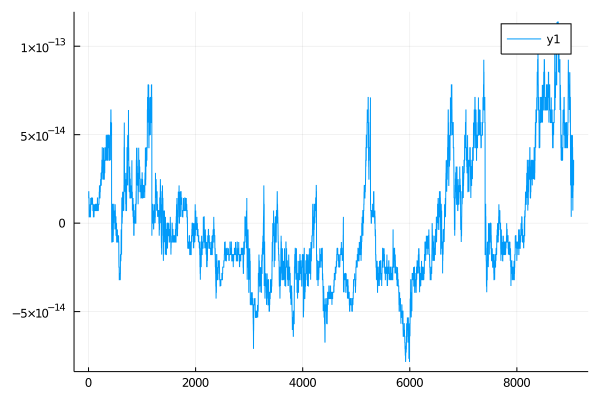

In [32]:
plot(ε, grid=true)